> **题目：基于RTMPose的耳朵穴位关键点检测**
> 背景：根据中医的“倒置胎儿”学说，耳朵的穴位反映了人体全身脏器的健康，耳穴按摩可以缓解失眠多梦、内分泌失调等疾病。耳朵面积较小，但穴位密集，涉及耳舟、耳轮、三角窝、耳甲艇、对耳轮等三维轮廓，普通人难以精准定位耳朵穴位。
> 任务 1.Labelme标注关键点检测数据集（子豪兄已经帮你完成了） 2.划分训练集和测试集（子豪兄已经帮你完成了） 3.Labelme标注转MS COCO格式（子豪兄已经帮你完成了） 4.使用MMDetection算法库，训练RTMDet耳朵目标检测算法，提交测试集评估指标 5.使用MMPose算法库，训练RTMPose耳朵关键点检测算法，提交测试集评估指标 6.用自己耳朵的图像预测，将预测结果发到群里 7.用自己耳朵的视频预测，将预测结果发到群里 需提交的测试集评估指标（不能低于baseline指标的50%）
> > 目标检测Baseline模型（RTMDet-tiny）
> 
> 
> ![242839237-e5b8d605-05f3-4e66-a33b-1ce8f8131574](https://user-images.githubusercontent.com/116380587/242841713-a90ee9ff-26ce-45f6-8649-62660f610340.png)
> > 关键点检测Baseline模型（RTMPose-s）
> > ![242793993-2af4dd12-db79-4b3f-b8a4-b75607855825](https://user-images.githubusercontent.com/116380587/242842024-2f4338fa-6044-4414-8af9-ea237328df9e.png)
> 
> 
> 数据集 耳朵穴位关键点检测数据集，MS COCO格式，划分好了训练集和测试集，并写好了样例config配置文件 链接: https://pan.baidu.com/s/1swTLpArj7XEDXW4d0lo7Mg 提取码: 741p 标注人：张子豪、田文博 ![242794021-82bc4ee2-ca64-4959-9461-9a12ba244b5e](https://user-images.githubusercontent.com/116380587/242842130-f3a0319b-f3d5-4895-a43a-31b21c136ad7.png)
> **提交方式** 请将作业内容上传到你自己的github仓库，并把对应的链接回复在飞书的作业一评论区


In [ ]:
# 删掉原有的 mmpose 文件夹（如有）
!rm -rf /content/mmpose

# 安装Pytorch

In [ ]:
!pip list

# 安装mmengine mmcv mmDetection

In [ ]:
%pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

In [ ]:
%pip install git+https://github.com/jin-s13/xtcocoapi

# 安装MMDetection

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -v -e .
# "-v" 指详细说明，或更多的输出
# "-e" 表示在可编辑模式下安装项目，因此对代码所做的任何本地修改都会生效，从而无需重新安装。

# 准备数据集

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%mkdir /content/data
%ls

CITATION.cff  LICENSE          projects/        requirements.txt  tools/
configs/      MANIFEST.in      pytest.ini       resources/
demo/         mmdet/           README.md        setup.cfg
docker/       mmdet.egg-info/  README_zh-CN.md  setup.py*
docs/         model-index.yml  requirements/    tests/


In [ ]:
%cp -r /content/gdrive/MyDrive/MMPoseWork/rtm* /content/data

In [ ]:
!unzip /content/gdrive/MyDrive/MMPoseWork/Ear210_Dataset_coco.zip -d /content/data  # 解压zip文件到指定文件夹

# 开启训练+评估

In [ ]:
!python ./tools/train.py /content/data/rtmdet_tiny_ear.py

06/04 12:50:44 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 2025998998
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

# 测试自己的耳朵

colab调用本地摄像头拍照并保存

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


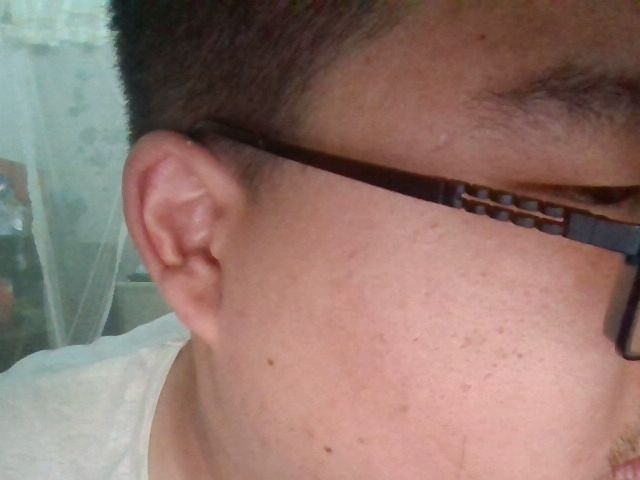

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# RTMDet-图片
%cd /content/mmdetection
!python demo/image_demo.py \
        photo.jpg \
        /content/data/rtmdet_tiny_ear.py \
        --weights work_dirs/rtmdet_tiny_ear/best_coco_bbox_mAP_epoch_27.pth \
        --out-dir outputs/E2_rtmdet \
        --device cuda:0 \
        --pred-score-thr 0.3

/content/mmdetection
Loads checkpoint by local backend from path: work_dirs/rtmdet_tiny_ear/best_coco_bbox_mAP_epoch_27.pth
06/04 14:23:39 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/04 14:23:39 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: 
torch.meshgrid: in an upcoming release, it will be required to pass the indexing
argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Inference ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   
results have been saved at outputs/E2_rtmde

## colab调用本地摄像头录制视频并保存

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np

def record_video(filename='video.webm'):
    js = Javascript("""
    async function recordVideo() {
        const options = { mimeType: "video/webm; codecs=vp9" };
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = "Start Recording";
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        let recorder = new MediaRecorder(stream, options);
        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        await new Promise((resolve) => {
            capture.onclick = resolve;
        });
        recorder.start();
        capture.textContent = "Stop Recording";
        await new Promise((resolve) => capture.onclick = resolve);
        recorder.stop();

        // Stop the device camera stream
        stream.getTracks()[0].stop();

        let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
        let arrBuffer = await recData.data.arrayBuffer(); 

        const binaryString = Array.from(new Uint8Array(arrBuffer)).map(bin => String.fromCharCode(bin)).join('');
        const base64String = btoa(binaryString);
        return base64String;
    }
    """)
    display(js)
    data=eval_js('recordVideo()')
    binary = b64decode(data)
    with open(filename, "wb") as video_file:
        video_file.write(binary)
    return filename

In [2]:
try:
    filename = record_video()
    print('Saved to {}'.format(filename))
except Exception as err:
    print(str(err))

<IPython.core.display.Javascript object>

Saved to video.webm


In [3]:
import subprocess

def convert_to_mp4(input_file, output_file):
    command = ['ffmpeg', '-i', input_file, output_file]
    subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Call the function
convert_to_mp4('video.webm', 'video.mp4')

In [4]:
import cv2

# 创建一个VideoCapture对象
cap = cv2.VideoCapture('video.mp4')

# 检查是否成功打开
if not cap.isOpened():
    print("Error opening video file")

# 定义视频编码器
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 

# 定义视频写入对象，指定输出文件名（例如output.mp4），编码器，帧率和视频宽高
out = cv2.VideoWriter('output.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS), (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while(cap.isOpened()):
    # 读取一帧
    ret, frame = cap.read()

    if ret:
        # 将帧写入新视频
        out.write(frame)
    else:
        break

# 在结束后释放VideoCapture和VideoWriter对象
cap.release()
out.release()

In [5]:
# RTMDet-视频
%cd /content/mmdetection
!python demo/video_demo.py \
        output.mp4 \
        /content/data/rtmdet_tiny_ear.py \
        work_dirs/rtmdet_tiny_ear/best_coco_bbox_mAP_epoch_27.pth \
        --device cuda:0 \
        --score-thr 0.3 \
        --out outputs/E2_out_video_rtmdet.mp4

/content/mmdetection
Loads checkpoint by local backend from path: work_dirs/rtmdet_tiny_ear/best_coco_bbox_mAP_epoch_27.pth
06/04 14:41:36 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/34, elapsed: 0s, ETA:/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[>>] 34/34, 5.8 task/s, elapsed: 6s, ETA:     0s


# 安装MMPose

In [ ]:
%cd /content
!git clone https://github.com/open-mmlab/mmpose.git
# The master branch is version 1.x 
%cd /content/mmpose
%pip install -r requirements.txt
%pip install -v -e .
# "-v" means verbose, or more output
# "-e" means installing a project in editable mode,

In [ ]:
%pip install -U numpy

In [12]:
%cd /content/mmpose

/content/mmpose


# 开启评估 + 训练

In [16]:
!python ./tools/train.py /content/data/rtmpose-s-ear.py

06/04 14:50:45 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 21
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm

## 测试自己的耳朵

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2

# 创建一个VideoCapture对象
cap = cv2.VideoCapture('video.mp4')

# 检查是否成功打开
if not cap.isOpened():
    print("Error opening video file")

# 定义视频编码器
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 

# 定义视频写入对象，指定输出文件名（例如output.mp4），编码器，帧率和视频宽高
out = cv2.VideoWriter('output.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS), (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while(cap.isOpened()):
    # 读取一帧
    ret, frame = cap.read()

    if ret:
        # 将帧写入新视频
        out.write(frame)
    else:
        break

# 在结束后释放VideoCapture和VideoWriter对象
cap.release()
out.release()

In [ ]:
# RTMDet --> RTMPose - 视频
!python demo/topdown_demo_with_mmdet.py \
        /content/mmdetection/data/样例config配置文件/rtmdet_tiny_ear.py \
        /content/mmdetection/work_dirs/rtmdet_tiny_ear/best_coco_bbox_mAP_epoch_1.pth \
        data/样例config配置文件/rtmpose-s-ear.py \
        work_dirs/rtmpose-s-ear/best_PCK_epoch_1.pth \
        --input output.mp4 \
        --output-root outputs/G2_Video \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 16 \
        --thickness 10 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx